# Programming with Python

## Episode 1b - Introduction to Plotting

Teaching: 60 min, 
Exercises: 30 min 


Objectives

- Perform operations on arrays of data.

- Plot simple graphs from data.

### Array operations
Often, we want to do more than add, subtract, multiply, and divide array elements. NumPy knows how to do more complex operations, too. If we want to find the average inflammation for all patients on all days, for example, we can ask NumPy to compute data's mean value:

```
print(numpy.mean(data))
```

In [1]:
import numpy
data=numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')



`mean()` is a function that takes an array as an argument.

However, not all functions have input.

Generally, a function uses inputs to produce outputs. However, some functions produce outputs without needing any input. For example, checking the current time doesn't require any input.

```
import time
print(time.ctime())
```

In [9]:
import time
print(time.ctime())

Tue Jun  9 03:21:50 2020


For functions that don't take in any arguments, we still need parentheses `()` to tell Python to go and do something for us.

NumPy has lots of useful functions that take an array as input. Let's use three of those functions to get some descriptive values about the dataset. We'll also use *multiple assignment*, a convenient Python feature that will enable us to do this all in one line.

```
maxval, minval, stdval = numpy.max(data), numpy.min(data), numpy.std(data)
```

In [10]:
maxval, minval, stdval = numpy.max(data), numpy.min(data), numpy.std(data)

Here we've assigned the return value from `numpy.max(data)` to the variable `maxval`, the return value from `numpy.min(data)` to `minval`, and so on. 

Let's have a look at the results:

```
print('maximum inflammation:', maxval)
print('minimum inflammation:', minval)
print('standard deviation:', stdval)
```

In [11]:
print('maximum inflammation:', maxval)
print('minimum inflammation:', minval)
print('standard deviation', stdval)

maximum inflammation: 20.0
minimum inflammation: 0.0
standard deviation 4.613833197118566


#### Mystery Functions in IPython

How did we know what functions NumPy has and how to use them? 

If you are working in IPython or in a Jupyter Notebook (which we are), there is an easy way to find out. If you type the name of something followed by a dot `.`, then you can use `Tab` completion (e.g. type `numpy.` and then press `tab`) to see a list of all functions and attributes that you can use. 

In [ ]:
numpy.

After selecting one, you can also add a question mark `?` (e.g. `numpy.cumprod?`), and IPython will return an explanation of the method! 

This is the same as running `help(numpy.cumprod)`.

In [10]:
numpy.cumprod?

Object `numpy.cumprod` not found.


When analysing data, though, we often want to look at variations in statistical values, such as the maximum inflammation per patient or the average inflammation per day. One way to do this is to create a new temporary array of the data we want, then ask it to do the calculation:

```
patient_0 = data[0, :]     # Comment: 0 on the first axis (rows), everything on the second (columns)
print('maximum inflammation for patient 0:', numpy.max(patient_0))
```

In [15]:
patient_0 = data[0 :]  # Comment: 0 on the first axis (rows), everything on the second (columns)
print('maximum inflammation for patient 0:', numpy.max(patient_0))

maximum inflammation for patient 0: 20.0


Everything in a line of code following the `#` symbol is a comment that is ignored by Python. Comments allow programmers to leave explanatory notes for other programmers or their future selves.

In [17]:
# test comment

We don't actually need to store the row in a variable of its own. Instead, we can combine the selection and the function call:

```
print('maximum inflammation for patient 2:', numpy.max(data[2, :]))
```

In [22]:
print('maximum inflammation for patient 2:', numpy.max(data[2, :]))

maximum inflammation for patient 2: 19.0


Operations Across Axes

What if we need the maximum inflammation for each patient over all days or the average for each day ? In other words want to perform the operation across a different axis.

To support this functionality, most array functions allow us to specify the axis we want to work on. If we ask for the average across axis 0 (rows in our 2D example), we get:

```
print(numpy.mean(data, axis=0))
```

In [23]:
print(numpy.mean(data, axis=0))

[ 0.          0.45        1.11666667  1.75        2.43333333  3.15
  3.8         3.88333333  5.23333333  5.51666667  5.95        5.9
  8.35        7.73333333  8.36666667  9.5         9.58333333 10.63333333
 11.56666667 12.35       13.25       11.96666667 11.03333333 10.16666667
 10.          8.66666667  9.15        7.25        7.33333333  6.58333333
  6.06666667  5.95        5.11666667  3.6         3.3         3.56666667
  2.48333333  1.5         1.13333333  0.56666667]


As a quick check, we can ask this array what its shape is:

```
print(numpy.mean(data, axis=0).shape)
```

The results (40,) tells us we have an N×1 vector, so this is the average inflammation per day for all 40 patients. If we average across axis 1 (columns in our  example), we use:

```
print(numpy.mean(data, axis=1))
```

In [12]:
print(numpy.mean(data, axis=0).shape) #patients
print(numpy.mean(data, axis=1).shape) #days

(40,)
(60,)


which is the average inflammation per patient across all days.

And if you are now confused, here's a simpler example:

```
tiny = [[1, 2, 3, 4],
        [10, 20, 30, 40],
        [100, 200, 300, 400]]
        
print(tiny)
print('Sum the entire matrix: ', numpy.sum(tiny))
```

In [13]:
tiny = [[1, 2, 3, 4],
        [10, 20, 30, 40],
        [100, 200, 300, 400]]

print(tiny)
print('Sum the entire matrix: ', numpy.sum(tiny))

[[1, 2, 3, 4], [10, 20, 30, 40], [100, 200, 300, 400]]
Sum the entire matrix:  1110


Now let's add the rows (first axis, i.e. zeroth)

```
print('Sum the columns (i.e. add the rows): ', numpy.sum(tiny, axis=0))
```

In [14]:
print('Sum the columns (i.e. add the rows): ', numpy.sum(tiny, axis=0))

Sum the columns (i.e. add the rows):  [111 222 333 444]


and now on the other dimension (axis=1, i.e. the second dimension)

```
print('Sum the rows (i.e. add the columns): ', numpy.sum(tiny, axis=1))
```

In [15]:
print('Sum the rows (i.e. add the columns): ', numpy.sum(tiny, axis=1))


Sum the rows (i.e. add the columns):  [  10  100 1000]


Here's a diagram to demonstrate how array axes work in NumPy:

![Data Files](data/numpy-axes.png)

- `numpy.sum(data)` --> Sum all elements in data
- `numpy.sum(data, axis=0)` --> Sum vertically (down, axis=0)
- `numpy.sum(data, axis=1)` --> Sum horizontally (across, axis=1)


### Visualising data

The mathematician Richard Hamming once said, “The purpose of computing is insight, not numbers,” and the best way to develop insight is often to visualise data.

Visualisation deserves an entire workshop of its own, but we can explore a few features of Python's `matplotlib` library here. While there is no official plotting library, `matplotlib` is the de facto standard. First, we will import the `pyplot` module from `matplotlib` and use two of its functions to create and display a heat map of our data:

```
import matplotlib.pyplot
plot = matplotlib.pyplot.imshow(data)
```

In [2]:
import matplotlib.pyplot

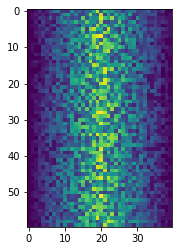

In [3]:
plot = matplotlib.pyplot.imshow(data)

#### Heatmap of the Data

Blue pixels in this heat map represent low values, while yellow pixels represent high values. As we can see, inflammation rises and falls over a 40-day period.

#### Some IPython Magic

If you're using a Jupyter notebook, you'll need to execute the following command in order for your matplotlib images to appear in the notebook when show() is called:

```
%matplotlib inline
```

In [4]:
%matplotlib inline

The `%` indicates an IPython magic function - a function that is only valid within the notebook environment. Note that you only have to execute this function once per notebook.

Let's take a look at the average inflammation over time:

```
ave_inflammation = numpy.mean(data, axis=0)
ave_plot = matplotlib.pyplot.plot(ave_inflammation)
```

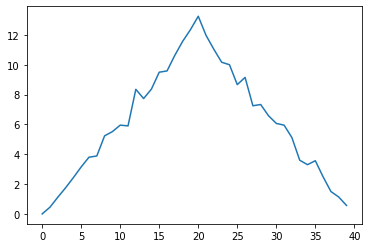

In [5]:
ave_inflammation = numpy.mean(data, axis=0)
ave_plot = matplotlib.pyplot.plot(ave_inflammation)

Here, we have put the average per day across all patients in the variable `ave_inflammation`, then asked `matplotlib.pyplot` to create and display a line graph of those values. The result is a roughly linear rise and fall, which is suspicious: we might instead expect a sharper rise and slower fall. 

Let's have a look at two other statistics, the maximum inflammation of all the patients each day:
```
max_plot = matplotlib.pyplot.plot(numpy.max(data, axis=0))
```

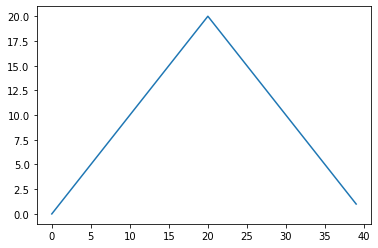

In [6]:
max_plot = matplotlib.pyplot.plot(numpy.max(data, axis=0))

... and the minimum inflammation across all patient each day ...
```
min_plot = matplotlib.pyplot.plot(numpy.min(data, axis=0))
matplotlib.pyplot.show()
```

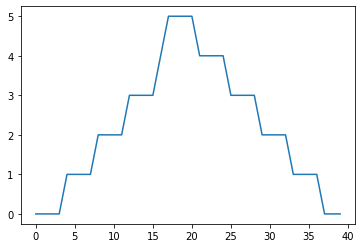

In [7]:
min_plot = matplotlib.pyplot.plot(numpy.min(data, axis=0))
matplotlib.pyplot.show()

The maximum value rises and falls smoothly, while the minimum seems to be a step function. Neither trend seems particularly likely, so either there's a mistake in our calculations or something is wrong with our data. This insight would have been difficult to reach by examining the numbers themselves without visualisation tools.

### Grouping plots

You can group similar plots in a single figure using subplots. This script below uses a number of new commands. The function `matplotlib.pyplot.figure()` creates a space into which we will place all of our plots. The parameter `figsize` tells Python how big to make this space. 

Each subplot is placed into the figure using its `add_subplot` method. The `add_subplot` method takes 3 parameters. The first denotes how many total rows of subplots there are, the second parameter refers to the total number of subplot columns, and the final parameter denotes which subplot your variable is referencing (left-to-right, top-to-bottom). Each subplot is stored in a different variable (`axes1`, `axes2`, `axes3`). 

Once a subplot is created, the axes can be labelled using the `set_xlabel()` command (or `set_ylabel()`). Here are our three plots side by side:


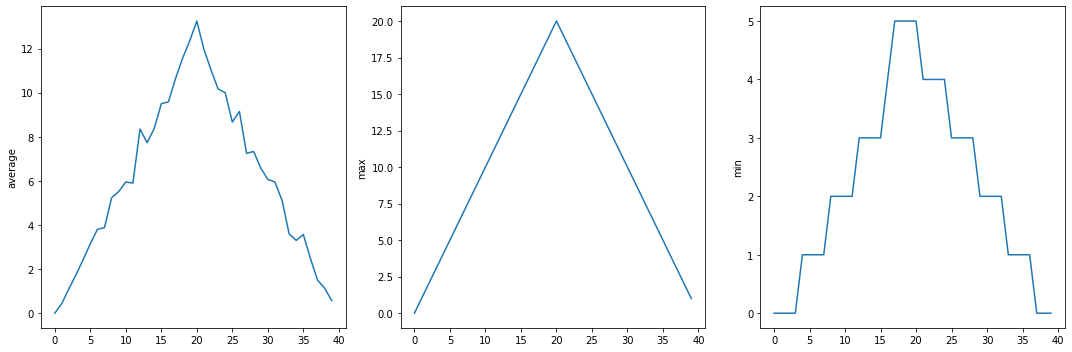

In [10]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(15.0, 5.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
plot = axes1.plot(numpy.mean(data, axis=0))

axes2.set_ylabel('max')
plot = axes2.plot(numpy.max(data, axis=0))

axes3.set_ylabel('min')
axes3.plot(numpy.min(data, axis=0))

fig.tight_layout()


##### The Previous Plots as Subplots

The call to `loadtxt` reads our data, and the rest of the program tells the plotting library how large we want the figure to be, that we're creating three subplots, what to draw for each one, and that we want a tight layout. (If we leave out that call to `fig.tight_layout()`, the graphs will actually be squeezed together more closely.)

Exercise: See if you can add the label `Days` to the X-Axis of each subplot

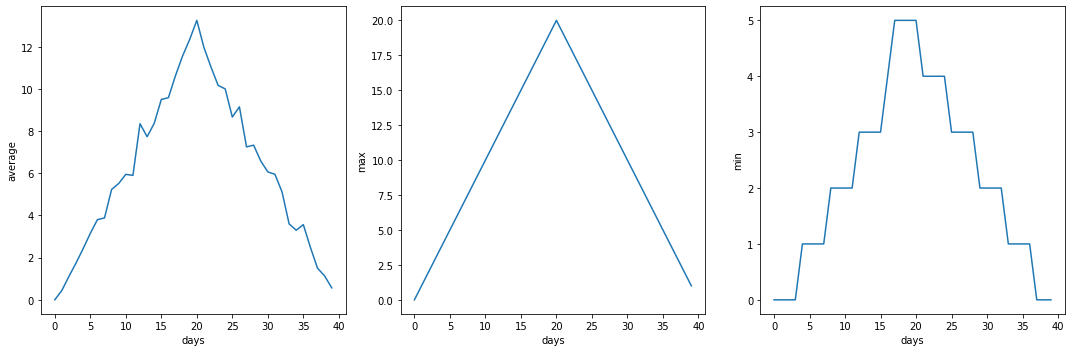

In [11]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(15.0, 5.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.set_xlabel('days')
plot = axes1.plot(numpy.mean(data, axis=0))

axes2.set_ylabel('max')
axes2.set_xlabel('days')
plot = axes2.plot(numpy.max(data, axis=0))

axes3.set_ylabel('min')
axes3.set_xlabel('days')
axes3.plot(numpy.min(data, axis=0))

fig.tight_layout()

##### Scientists Dislike Typing. 
We will always use the syntax `import numpy` to import NumPy. However, in order to save typing, it is often suggested to make a shortcut like so: `import numpy as np`. If you ever see Python code online using a NumPy function with np (for example, `np.loadtxt(...))`, it's because they've used this shortcut. When working with other people, it is important to agree on a convention of how common libraries are imported.

In other words:

```
import numpy
numpy.random.rand()
```

is the same as:

```
import numpy as np
np.random.rand()
```


## Exercises

### Plot Scaling
Why do all of our plots stop just short of the upper end of our graph?

Solution:

If we want to change this, we can use the `set_ylim(min, max)` method of each ‘axes’, for example:
```
axes3.set_ylim(0,6)
```
Update your plotting code to automatically set a more appropriate scale. (Hint: you can make use of the max and min methods to help.)

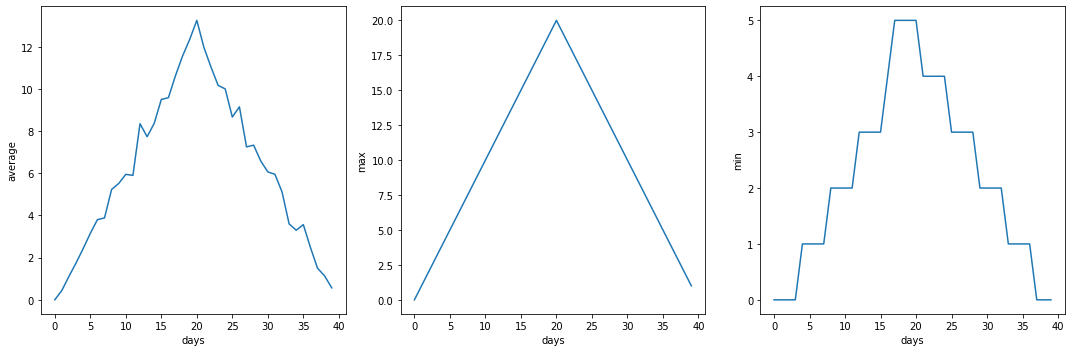

In [19]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(15.0, 5.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.set_xlabel('days')
plot = axes1.plot(numpy.mean(data, axis=0))

axes2.set_ylabel('max')
axes2.set_xlabel('days')
plot = axes2.plot(numpy.max(data, axis=0))

axes3.set_ylabel('min')
axes3.set_xlabel('days')
axes3.plot(numpy.min(data, axis=0))


fig.tight_layout()

### Drawing Straight Lines
In the centre and right subplots above, we expect all lines to look like step functions because non-integer value are not realistic for the minimum and maximum values. However, you can see that the lines are not always vertical or horizontal, and in particular the step function in the subplot on the right looks slanted. Why is this?

Try adding a `drawstyle` parameter to your plotting:
```
axes2.set_ylabel('average')
axes2.plot(numpy.mean(data, axis=0), drawstyle='steps-mid')
```

Solution:

### Make Your Own Plot
Create a plot showing the standard deviation (using `numpy.std`) of the inflammation data for each day across all patients.

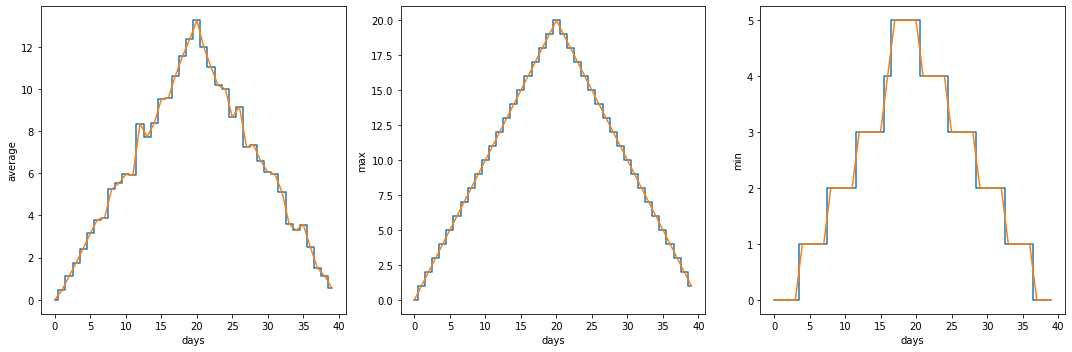

In [20]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(15.0, 5.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)


axes1.set_ylabel('average')
axes1.plot(numpy.mean(data, axis=0), drawstyle='steps-mid')
axes1.set_xlabel('days')
plot = axes1.plot(numpy.mean(data, axis=0))

axes2.set_ylabel('max')
axes2.set_xlabel('days')
axes2.plot(numpy.max(data, axis=0), drawstyle='steps-mid')
plot = axes2.plot(numpy.max(data, axis=0))

axes3.set_ylabel('min')
axes3.plot(numpy.min(data, axis=0), drawstyle='steps-mid')
axes3.set_xlabel('days')
axes3.plot(numpy.min(data, axis=0))

fig.tight_layout()

### Moving Plots Around
Modify the program to display the three plots vertically rather than side by side.

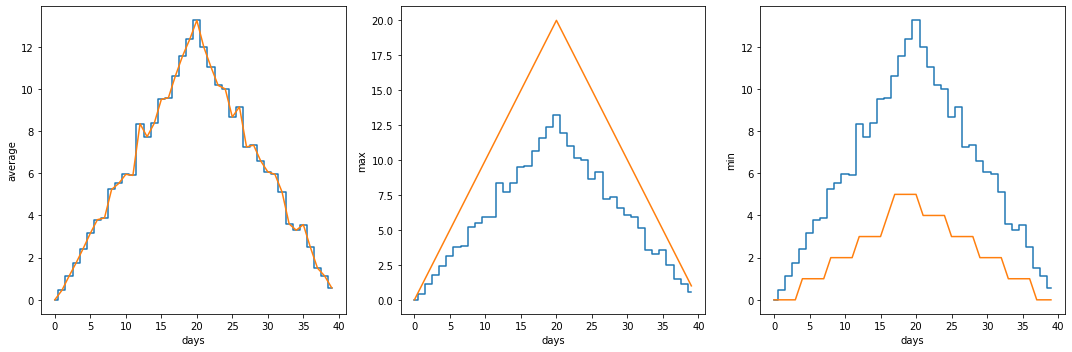

In [17]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(15.0, 5.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(numpy.mean(data, axis=0), drawstyle='steps-mid')
axes1.set_xlabel('days')
plot = axes1.plot(numpy.mean(data, axis=0))

axes2.set_ylabel('max')
axes2.set_xlabel('days')
axes2.plot(numpy.mean(data, axis=0), drawstyle='steps-mid')
plot = axes2.plot(numpy.max(data, axis=0))

axes3.set_ylabel('min')
axes3.plot(numpy.mean(data, axis=0), drawstyle='steps-mid')
axes3.set_xlabel('days')
axes3.plot(numpy.min(data, axis=0))

fig.tight_layout()

### Stacking Arrays
Arrays can be concatenated and stacked on top of one another, using NumPy’s `vstack` and `hstack` functions for vertical and horizontal stacking, respectively.

Run the following code to view `A`, `B` and `C`


In [ ]:
import numpy

A = numpy.array([[1,2,3], [4,5,6], [7, 8, 9]])
print('A = ')
print(A)

B = numpy.hstack([A, A])
print('B = ')
print(B)

C = numpy.vstack([A, A])
print('C = ')
print(C)

Write some additional code that slices the first and last columns of `A`,
and stacks them into a 3x2 array. Make sure to print the results to verify your solution.

In [ ]:
print(A[:,0]) # all rows from first column

print(result)

### Change In Inflammation
This patient data is longitudinal in the sense that each row represents a series of observations relating to one individual. This means that the change in inflammation over time is a meaningful concept.

The `numpy.diff()` function takes a NumPy array and returns the differences between two successive values along a specified axis. For example, with the following `numpy.array`:

```
npdiff = numpy.array([ 0,  2,  5,  9, 14])
```

Calling `numpy.diff(npdiff)` would do the following calculations 

`2 - 0`, `5 - 2`, `9 - 5`, `14 - 9`

and produce the following array.

`[2, 3, 4, 5]`

In [ ]:
npdiff = numpy.array([ 0,  2,  5,  9, 14])
numpy.diff(npdiff)

In our `data` Which axis would it make sense to use this function along?

Solution

If the shape of an individual data file is (60, 40) (60 rows and 40 columns), what would the shape of the array be after you run the diff() function and why?

Solution

How would you find the largest change in inflammation for each patient? Does it matter if the change in inflammation is an increase or a decrease?  Hint: NumPy has a function called `numpy.absolute()`,

Solution:

## Key Points
Use `numpy.mean(array)`, `numpy.max(array)`, and `numpy.min(array)` to calculate simple statistics.

Use `numpy.mean(array, axis=0)` or `numpy.mean(array, axis=1)` to calculate statistics across the specified axis.

Use the `pyplot` library from `matplotlib` for creating simple visualizations.

# Save, and version control your changes

- save your work: `File -> Save`
- add all your changes to your local repository: `Terminal -> git add .`
- commit your updates a new Git version:  `Terminal -> git commit -m "End of Episode 1b"`
- push your latest commits to GitHub: `Terminal -> git push`